# BAIT 509 Assignment 1: An introduction to Decision Trees, $k$-NN, Cross-validation and ML Fundamentals

Git repo:https://github.com/Aizenz/BAIT509assignments.git

__Evaluates__: Lectures 1 - 3. 

__Rubrics__: Your solutions will be assessed primarily on the accuracy of your coding, as well as the clarity and correctness of your written responses. The MDS rubrics provide a good guide as to what is expected of you in your responses to the assignment questions and how the TAs will grade your answers. See the following links for more details:

- [mechanics_rubric](https://github.com/UBC-MDS/public/blob/master/rubric/rubric_mech.md): submit an assignment correctly.
- [accuracy rubric](https://github.com/UBC-MDS/public/blob/master/rubric/rubric_accuracy.md): evaluating your code.
- [reasoning rubric](https://github.com/UBC-MDS/public/blob/master/rubric/rubric_reasoning.md): evaluating your written responses.
- [autograde rubric](https://github.com/UBC-MDS/public/blob/master/rubric/rubric_autograde.md): evaluating questions that are either right or wrong (can be done either manually or automatically).

## Tidy Submission 
rubric={mechanics:2}

- Complete this assignment by filling out this jupyter notebook.
- Any place you see `...` or `____`, you must fill in the function, variable, or data to complete the code.
- Use proper English, spelling, and grammar.
- You will submit two files on Canvas:
    1. This jupyter notebook file containing your responses ( an `.ipynb` file); and,
    2. An `.html` file of your completed notebook that will render directly on Canvas without having to be downloaded.
        - To generate this html file you can click `File` -> `Export Notebook As` -> `HTML` in JupyterLab or type the following into a terminal `jupyter nbconvert --to html_embed assignment.ipynb`).
    
 <br>  

 Submit your assignment through UBC Canvas by the deadline listed there.

## Introduction and learning goals <a name="in"></a>
<hr>

Welcome to the assignment! In this assignment, you will work on the following:

- create `X` (feature vectors) and `y` (targets) from a given dataset.  
- use the `fit` and `predict` paradigms in `sklearn`.
- use the `score` method in `sklearn` to calculate classification accuracy. 
- use `train_test_split` for data splitting and explain the importance of shuffling during data splitting. 
- train a decision tree using `sklearn`.
- build a decision tree classifier on a real-world dataset.
- build a $k$-nn classifier and explore different hyperparameters.
- discuss the relationship between train accuracy and test accuracy and overfitting.
- Choose an appropriate hyperparameter value for your model.

### Exercise 1: Decision trees with a toy dataset <a name="1"></a>
<hr>

Suppose you have three different job offers with comparable salaries and job descriptions. You want to decide which one to accept, and you want to make this decision based on which job is likely to make you happy. Being a very systematic person, you come up with three features associated with the offers, which are important for your happiness: whether the colleagues are supportive, work-hour flexibility, and whether the company is a start-up or not (the columns `Supportive`, `Flexible` and `Startup` respectively). 

In [1]:
import pandas as pd

offer_data = {
    # Features
    "Supportive": [1, 0, 0],
    "Flexible": [0, 0, 1],
    "Startup": [0, 1, 1],
    # Target
    "target": ["?", "?", "?"],
}

offer_df = pd.DataFrame(offer_data)
offer_df

,Supportive,Flexible,Startup,target
0,1,0,0,?
1,0,0,1,?
2,0,1,1,?


Next, you ask the following questions to some of your friends (who you think have similar notions of happiness) regarding their jobs:

1. Do you have supportive colleagues? (1 for 'yes' and 0 for 'no')
2. Do you have flexible work hours? (1 for 'yes' and 0 for 'no')
3. Do you work for a start-up? (1 for 'start up' and 0 for 'non start up')
4. Are you happy with your job? (happy or unhappy)

You get the following data from this survey. You want to train a machine learning model using this data and then use this model to predict which job is likely to make you happy. 

In [2]:
happiness_data = {
    # Features
    "Supportive": [1, 1, 1, 0, 0, 1, 1, 0, 1, 0],
    "Flexible": [1, 1, 0, 1, 1, 0, 1, 0, 0, 0],
    "Startup": [1, 0, 1, 0, 1, 0, 0, 1, 1, 0],
    # Target
    "target": [
        "happy",
        "happy",
        "happy",
        "unhappy",
        "unhappy",
        "happy",
        "happy",
        "unhappy",
        "unhappy",
        "unhappy",
    ],
}

train_df = pd.DataFrame(happiness_data)
train_df

,Supportive,Flexible,Startup,target
0,1,1,1,happy
1,1,1,0,happy
2,1,0,1,happy
3,0,1,0,unhappy
4,0,1,1,unhappy
5,1,0,0,happy
6,1,1,0,happy
7,0,0,1,unhappy
8,1,0,1,unhappy
9,0,0,0,unhappy


### 1.1 Decision stump by hand 
rubric={autograde:2}

If you manually built a decision stump (decision tree with only 1 split) by splitting on the condition `Supportive == 1` by hand, how would you predict each of the employees? 

Save your prediction for each employee as a string element in a list named `predict_employees`. 
Example:

```
predict_employees = ['happy', 'unhappy', 'unhappy',  'unhappy', 'unhappy', 'happy', 'happy', 'happy',  'unhappy',  'unhappy'] 
```

(Note: you do not need to use a model here. By looking at the target column and the feature `Supportive` what rows would you predict to have which labels?) 

In [3]:
# Replace the `...` with your list of hapiness predictions
predict_employees = ['happy' if x==1 else 'unhapply' for x in train_df['Supportive'] ]
predict_employees 

['happy',
 'happy',
 'happy',
 'unhapply',
 'unhapply',
 'happy',
 'happy',
 'unhapply',
 'happy',
 'unhapply']

### 1.2 Decision stump accuracy

rubric={autograde:2}

What training accuracy would you get with this decision stump above?

Save the accuracy as a decimal in an object named `supportive_colleagues_acc`. 

In [4]:
supportive_colleagues_acc = sum([1 if predict_employees[i] == train_df['target'][i] 
                                 else 0 for i in range(len(predict_employees))]
                                )/len(predict_employees)
supportive_colleagues_acc

0.5

### 1.3 Create `X`, `y`
rubric={mechanics:2}

Recall that in `scikit-learn` before building a classifier we need to create `X` (features) and `y` (target). 

**Your tasks:**

From `train_df`, create `X` and `y`; save them in objects named `X` and `y`, respectively. 

In [5]:
X = train_df.iloc[:,0:3]
y = train_df['target']

### 1.4 `fit` a decision tree classifier 
rubric={accuracy:2}

The idea of a machine learning algorithm is to *fit* the best model on the given training data, `X` (features) and `y` (their corresponding targets) and then using this model to *predict* targets for new examples. 

**Your tasks:**

Build a decision tree named `toy_tree` and fit it on the toy data using `sklearn`'s [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html). Don't forget to make the necessary import(s) first.

In [6]:
from sklearn.tree import DecisionTreeClassifier
toy_tree = DecisionTreeClassifier()
toy_tree.fit(X,y)

DecisionTreeClassifier()

### 1.5 `score` 
rubric={accuracy:2}

Score the decision tree on the training data (`X` and `y`).
Save the results in an object named `toy_score` and output the score at the end of the cell.

In [7]:
toy_score = toy_tree.score(X,y)
print(toy_score)

0.9


### 1.6 Explain training score
rubric={reasoning:2}

Do you get perfect training accuracy? Why or why not? 

Solution:
No, the score is 0.9 which means we have made 10% errors. That

### 1.7 Getting features

rubric={accuracy:2}

The first `offer_df` dataframe has no target values and we want to use the model we just made to make predictions. 
Drop the column `target` from the object and rename this dataframe `test_X`. 

In [8]:
test_X = offer_df.drop(columns='target')
test_X

,Supportive,Flexible,Startup
0,1,0,0
1,0,0,1
2,0,1,1


### 1.8 `predict`
rubric={accuracy:2}

Now make predictions on the jobs offered in `test_X`. Save the predictions in an object named `predicted`. 


In [9]:
predicted = toy_tree.predict(test_X)
predicted

array(['happy', 'unhappy', 'unhappy'], dtype=object)

### 1.9 Happy job
rubric={reasoning:2}

Looking at the predictions, in which job you are likely to be happy?

*Answer: The first job*

## Exercise 2: Decision trees on a real dataset <a name="2"></a>
<hr>

### Introducing the Spotify Song Attributes dataset
 
For the rest of the assignment, you'll be using Kaggle's [Spotify Song Attributes](https://www.kaggle.com/geomack/spotifyclassification/home) dataset.
The dataset contains a number of features of songs from 2017 and **a binary target variable representing whether the user liked the song or not** (1 = liked, 0 = did not like). See the documentation of all the features [here](https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/). The supervised machine learning task for this dataset is predicting  whether the user likes a song or not given a number of song features.

This dataset is publicly available on Kaggle, but not licensed to be freely distributed. So we do not provide this dataset, and you will have to download it yourself and add it to the same folder as this assignment. Follow the steps below to get the data CSV. 

- If you do not have an account with Kaggle, you will first need to create one. (It's free.) 
- Login to your account and [download the data](https://www.kaggle.com/geomack/spotifyclassification/).  
- (You should always) Read the [terms and conditions](https://www.kaggle.com/terms) before using the data.
- Save the CSV in the same folder as you saved this notebook file. (You DO NOT submit this `.csv` file on canva)   

The starter code below reads the data CSV file into the notebook. make sure you named the csv file `data.csv`

In [10]:
spotify_df = pd.read_csv("data.csv", index_col=0)
spotify_df.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


### 2.1 Split your data
rubric={accuracy:2}

Split your `spotify_df` into your train and test splits.  Name the training data `train_df` and the testing data `test_df` using an 80/20 train to test split. Set your `random_state` to 77 to keep it consistent and facilitate grading.

In [11]:
# Assign the splits to train_df and test_df
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(spotify_df,test_size=0.2,train_size=0.8,random_state=77)

### 2.2 Explaining histograms 

rubric={reasoning:3}

A good thing to do before starting to train our models
would be to explore the features visually so that we have an idea of what the data looks like.
It is often beneficial to view the distributions of data for each feature.

I have created histograms below for each of the features,
showing the distribution for each target class.
Study these histograms and then answer in 1-2 sentences which features and split values you think might be useful in differentiating the target classes?

In [12]:
import altair as alt

alt.Chart(train_df.sort_values(by='target')).mark_bar(opacity=0.6).encode(
    alt.X(alt.repeat(), bin=alt.Bin(maxbins=50)),
    alt.Y('count()', stack=None),
    alt.Color('target:N')
).properties(
    height=200
).repeat(
    ["acousticness", "danceability", "tempo", "instrumentalness", "energy", "valence"],
    columns=2
)

/Users/aizenz/anaconda3/envs/bait509/lib/python3.11/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.RepeatChart(...)

*Answer for this question:*
I think `danciability` and `energy` might be useful for prediction the target value, beacuse their distribution overlaped less.

## Exercise 3: Cross-validation and model building <a name="3"></a>
<hr>
Recall that in machine learning what we care about is generalization; we want to build models that generalize well on unseen examples. One way to ensure this is by splitting the data into training data and test data, building and tuning the model only using the training data, and then doing the final assessment on the test data. 

We've provided you with some starter code that separates `train_df` and `test_df` into their respective features and target objects. We removed the columns `song_title` and `artist` from the feature objects since they would need additional processing to be used in our model. 

In [13]:
X_train = train_df.drop(columns = ['song_title', 'artist','target'])
y_train = train_df['target']
X_test = test_df.drop(columns = ['song_title', 'artist','target'])
y_test = test_df['target']

### 3.1 Building a Dummy Classifier
rubric={accuracy:3}

Build a `DummyClassifier` using the strategy `most_frequent`.

Train it on `X_train` and `y_train`. Score it on the train **and** test sets.

In [14]:
from sklearn.dummy import DummyClassifier
dummy_model = DummyClassifier(strategy="most_frequent")
dummy_model.fit(X_train,y_train)
display("The train set score is:")
display(dummy_model.score(X_train,y_train))
display("The test set socre is:")
dummy_model.score(X_test,y_test)


'The train set score is:'

0.5015499070055797

'The test set socre is:'

0.46534653465346537

### 3.2 Building a Decision Tree Classifier
rubric={accuracy:3}

Build a Decision Tree classifier without setting any hyperparameters. Cross-validate with the appropriate objects, passing `return_train_score=True` and setting the number of folds to 10. (See the note in lecture 2 for help).

Display the scores from `.cross_validate()` in a dataframe. 

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
dt_model = DecisionTreeClassifier()
dt_cv_scores = cross_validate(dt_model,X_train,y_train,cv=10,return_train_score=True)
dt_cv_scores = pd.DataFrame(dt_cv_scores)
dt_cv_scores

,fit_time,score_time,test_score,train_score
0,0.009473,0.000723,0.679012,0.998622
1,0.008771,0.000912,0.722222,0.998622
2,0.009891,0.000806,0.697531,0.998622
3,0.008924,0.000830,0.677019,0.998623
4,0.009035,0.000799,0.645963,0.998623
5,0.009253,0.000565,0.726708,0.998623
6,0.009370,0.000869,0.664596,0.999311
7,0.009453,0.000658,0.633540,0.999311
8,0.008931,0.000522,0.627329,1.000000
9,0.009118,0.000489,0.689441,0.998623


### Question 3.3 Decision Tree training and validation scores
rubric={accuracy:1, reasoning:1}

What are the mean validation and train scores? In 1-2 sentences, explain your results. Is your model overfitting or underfitting? 

In [16]:
dt_cv_means = dt_cv_scores.mean()
dt_cv_means

fit_time       0.009222
score_time     0.000717
test_score     0.676336
train_score    0.998898
dtype: float64

*Answers:*
the average train_score is 99.89% while the test_score average is only 69.30%. The significant gap between those scores indicated that our model is **OVERFITTING**. The model did great on train_score while did badly on test_score.

### 3.4 Building a $k$-NN Classifier
rubric={accuracy:3}

Build a $k$-NN classifier using the default hyperparameters. Cross-validate with the appropriate objects, passing `return_train_score=True` and setting the number of folds to 10.

Display the scores from `.cross_validate()` in a dataframe. 

In [17]:
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_cv_scores = cross_validate(knn_model,X = X_train, y = y_train, return_train_score=True, cv=10)
knn_cv_scores = pd.DataFrame(knn_cv_scores)
knn_cv_scores

,fit_time,score_time,test_score,train_score
0,0.001042,0.002995,0.524691,0.729841
1,0.001066,0.002760,0.574074,0.725017
2,0.001185,0.003023,0.592593,0.725017
3,0.001006,0.002901,0.602484,0.716942
4,0.001065,0.002874,0.565217,0.714876
5,0.000901,0.002865,0.559006,0.719697
6,0.000809,0.002585,0.534161,0.732094
7,0.001070,0.002585,0.621118,0.722452
8,0.000895,0.002812,0.583851,0.734160
9,0.000846,0.002540,0.565217,0.722452


### Question 3.5 $k$-NN training and validation scores 
rubric={accuracy:1, reasoning:1}

What are the mean validation and train scores for your $k$-NN classifier? In 1-2 sentences, explain your results.

In [18]:
knn_cv_mean = knn_cv_scores.mean()
knn_cv_mean

fit_time       0.000989
score_time     0.002794
test_score     0.572241
train_score    0.724255
dtype: float64

*Answer:*
The train scores response to the accuracy on given train set while test scores response to the remains. From the score before we might conclude that our model were **OVERFITTING**. Because there is significant gap between test_score to train_score, which means that the model did better in train set while did worse in test set.

### 3.6 Compare the models
rubric={reasoning:2}

In 1-2 sentences, compare the 3 models.

*Answer:*
* For accuracy, decision tree > KNN > dummy classifier
* For stability, dummy classifier >> decision tree/KNN. Both decision tree and KNN models need further fine tune for better performance.
* We need to adjust hyperparameters for the above two to get proper fitting instead of overfitting.

## Exercise 4: Hyperparameters <a name="5"></a>
<hr>

We explored the `max_depth` hyperparameter of the `DecisionTreeClassifier` in lecture 2 but in this assignment, you'll explore another hyperparameter, `min_samples_split`. See the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) for more details on this hyperparameter.

### 4.1 `min_samples_splits`
rubric={accuracy:5}

Using 10-fold cross-validation and the training set only, find an appropriate value within the range 5 to 105 for the `min_samples_split` hyperparameter for a decision tree classifier.

For each `min_samples_split` value:

- Create a `DecisionTreeClassifier` object with the `min_samples_split` value.
- Run 10-fold cross-validation with this `min_samples_split` using `cross_validate` to get the mean train and validation accuracies. Remember to use `return_train_score` argument to get the training score in each fold. 

In a pandas dataframe, for each `min_samples_split` show the mean train and cross-validation score. 

*Hint: We did something similar in lecture 2 (under **The "Fundamental Tradeoff" of Supervised Learning**) which you can refer to if you need help.* 

In [19]:

results_dict = {"depth": list(), "mean_train_score": list(), "mean_cv_score": list()}

# Iterate over the hyperparameter values
for depth in range(5, 105):
    model = DecisionTreeClassifier(min_samples_split=depth)
    scores = cross_validate(model, X_train, y_train, cv=10, return_train_score=True)
    results_dict["depth"].append(depth)
    results_dict["mean_cv_score"].append(scores["test_score"].mean())
    results_dict["mean_train_score"].append(scores["train_score"].mean())

results_df = pd.DataFrame(results_dict).set_index('depth')
results_df

,mean_train_score,mean_cv_score
depth,,
5,0.976234,0.678817
6,0.967762,0.682517
7,0.957429,0.685013
8,0.948818,0.684399
9,0.941516,0.682540
...,...,...
100,0.785356,0.694314
101,0.784529,0.696181
102,0.783152,0.696174


### 4.2 Plotting and interpreting
rubric={accuracy:3, viz:1}

Using whatever tool you like for plotting,  make a plot with the `min_samples_split` of the decision tree on the *x*-axis and the accuracy on the train and validation sets on the *y*-axis. 

(Again we did this in lecture 2 if you need any guidance)

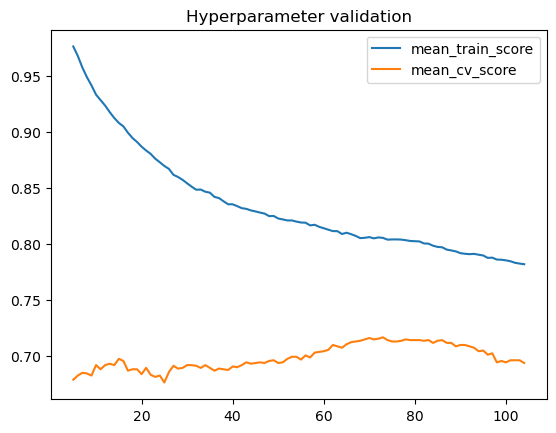

In [20]:
import seaborn as sns
import  matplotlib.pyplot as plt

plt.plot(results_df)
plt.legend(['mean_train_score','mean_cv_score'])
# Display the plot
plt.title("Hyperparameter validation")
plt.show()

In [21]:
print(results_df)

       mean_train_score  mean_cv_score
depth                                 
5              0.976234       0.678817
6              0.967762       0.682517
7              0.957429       0.685013
8              0.948818       0.684399
9              0.941516       0.682540
...                 ...            ...
100            0.785356       0.694314
101            0.784529       0.696181
102            0.783152       0.696174
103            0.782463       0.696174
104            0.781912       0.693693

[100 rows x 2 columns]


### 4.3 Picking `min_samples_split`
rubric={accuracy:1, reasoning:2}

Based on your results from 4.2, what `min_samples_split` value would you pick in your final model? In 1-2 sentences briefly explain why you chose this particular value.

In [22]:
# Which value of min_samples_split is the best
results_df['gap'] = results_df.mean_train_score - results_df.mean_cv_score
best_split = results_df.loc[results_df.gap == results_df.gap.min()]
best_split =pd.concat((best_split,results_df.loc[results_df.mean_cv_score == results_df.mean_cv_score.max()]))
best_split

,mean_train_score,mean_cv_score,gap
depth,,,
91,0.791211,0.709819,0.081392
73,0.805400,0.716655,0.088745


*Answer:*
I chose depth of 72 because it has the highest mean_cv_score while a acceptable gap towards mean_train_score. It balanced between accuracy and stability.

> 92 has the lowest gap while 72 has the highest test score. We might have different choose when facing such situation.


### 4.4 Final model
rubric={accuracy:2,reasoning:1}

Train a decision tree classifier with the best `min_samples_split` using `X_train` and `y_train` and now carry out a final assessment by obtaining the test score on the test set.

In [23]:
model = DecisionTreeClassifier(min_samples_split=72)
model.fit(X = X_train, y = y_train)
model.score(X = X_test, y = y_test)

0.6658415841584159

**GREAT!!**

The result is quite closed to our validation result!

### Submission to Canvas

**PLEASE READ: When you are ready to submit your assignment do the following:**

- Read through your solutions
- **Restart your kernel and clear output and rerun your cells from top to bottom** 
- Makes sure that none of your code is broken 
- Verify that the tests from the questions you answered have obtained the output "Success"
- Convert your notebook to .html format by going to File -> Export Notebook As... -> Export Notebook to HTML
- Upload your `.ipynb` file and the `.html` file to Canvas under Assignment1. 
- **DO NOT** upload any `.csv` files. 

### Congratulations on finishing Assignment 1!